## Cabi Exploratory Analysis

Using boxplot to explore how members or casual riders use capital bikshare

In [1]:
import sys
sys.path.append("..")
import numpy as np
from read_aws import *
import seaborn as sns
from seaborn import *
import matplotlib.pyplot as plt
from google_drive_push import *
%matplotlib inline

In [2]:
conn = read_only_connect_aws()
Full_Data = QueryTool(conn, 'final_db')
df = Full_Data.basic()
starting_data = df


In [3]:
dr = open_drive() 

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=496206805628-tg936o9a8g2km3uqqalfcd7go7c7ebio.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code

Authentication successful.


# Optional Graph
Total trips, average duration, average distance, average cost

0 cabi_trips
1 cabi_trip_dur_avg
2 cabi_trip_dist_avg
3 cabi_trip_cost_avg


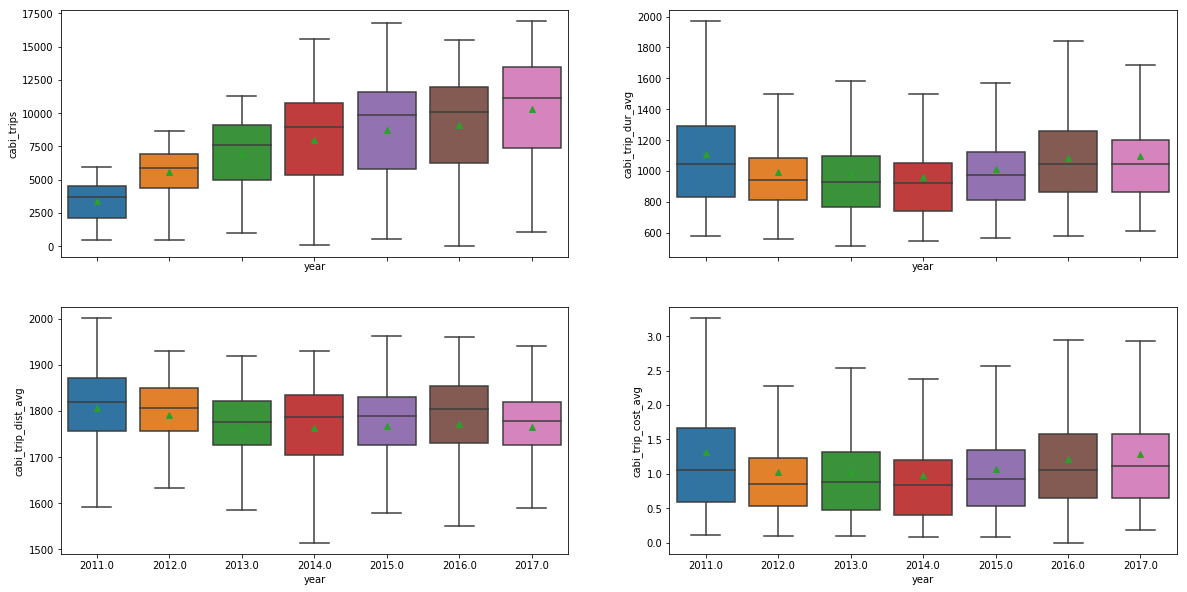

In [4]:
variables =['cabi_trips', 'cabi_trip_dur_avg', 'cabi_trip_dist_avg' , 'cabi_trip_cost_avg']
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(20,10))
axs = axs.ravel()
for i, var in enumerate(variables):
    print(i, var)
    sns.boxplot(x="year", y=var, data=df[(df['year'] <=2017) & (df['year'] >=2011) ], ax= axs[i], showfliers=False, showmeans=True)
all_in_one_save(
        "Optional Graphs Cabi", "C:/Users/Noah/Bikeshare-DC_Old/For Upload", dr,
        '1LRJWj6wLBWvyBJbN93jXA2dpgF3BLrN3')

In [5]:
df = starting_data
df['year'] = df['year'].astype(int)

# Daily CaBi Trips by Year
System wide - DC to DC

0 cabi_trips
1 cabi_trips_wdc_to_wdc


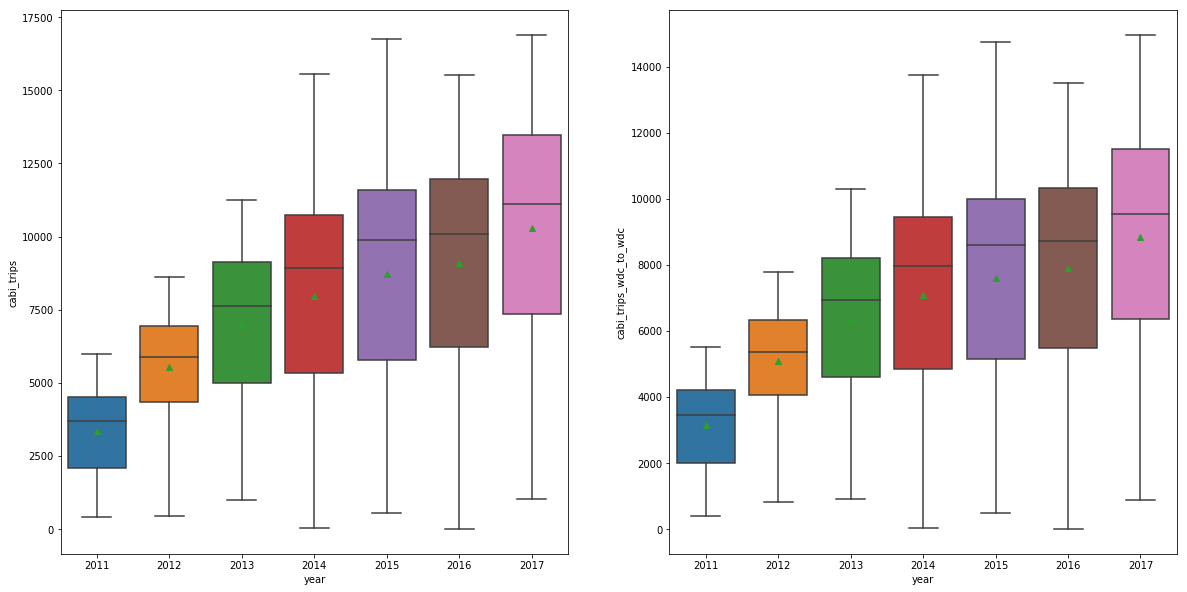

In [6]:
variables =['cabi_trips', 'cabi_trips_wdc_to_wdc']
fig, axs = plt.subplots(1, 2, sharex=True, figsize=(20,10))
axs = axs.ravel()
for i, var in enumerate(variables):
    print(i, var)
    sns.boxplot(x="year", y=var, data=df[(df['year'] <=2017) & (df['year'] >=2011) ], ax= axs[i], showfliers=False, showmeans=True)
all_in_one_save(
        "Daily Cabi Trips", "C:/Users/Noah/Bikeshare-DC_Old/For Upload", dr,
        '1LRJWj6wLBWvyBJbN93jXA2dpgF3BLrN3')

## CaBi Bike Utilization Rate by Year
    - Casual vs Memebership 



In [7]:
#utilization rate
df['cabi_trips_casual_util'] = df['cabi_trips_wdc_to_wdc_casual'] / df['cabi_bikes_avail']
df['cabi_trips_member_util'] = df['cabi_trips_wdc_to_wdc_member'] / df['cabi_bikes_avail']
df['cabi_trips_member_perc'] = df['cabi_trips_wdc_to_wdc_member'] / df['cabi_trips_wdc_to_wdc']

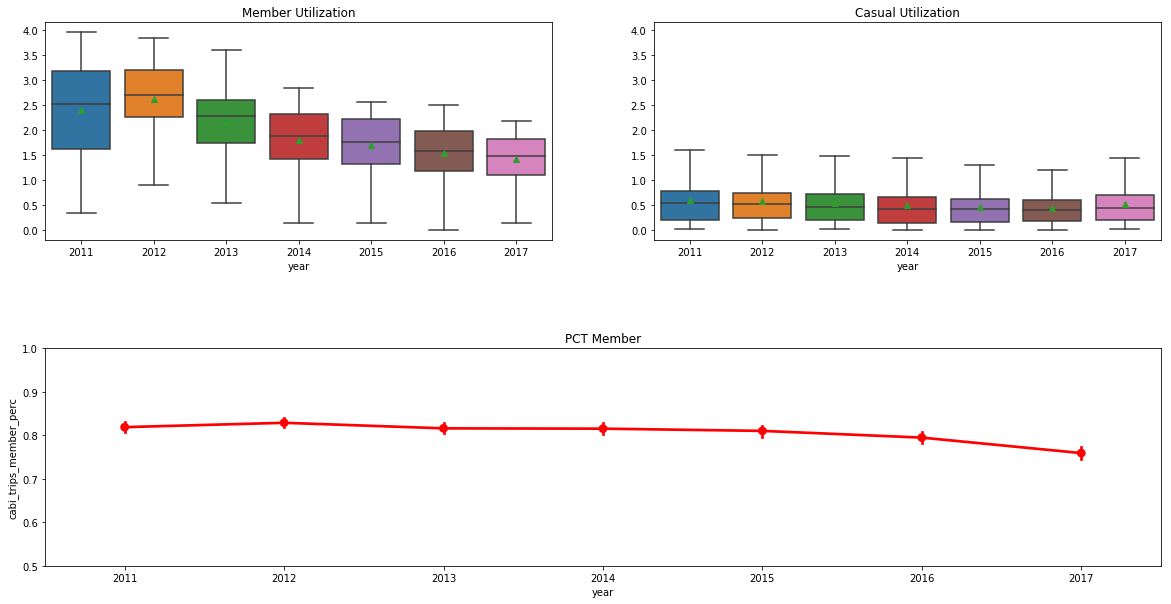

In [8]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222, sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(212)
sns.boxplot(x="year", y='cabi_trips_member_util', data=df[(df['year'] <=2017) & (df['year'] >=2011)], ax= ax1, showfliers=False, showmeans=True)
sns.boxplot(x="year", y='cabi_trips_casual_util', data=df[(df['year'] <=2017) & (df['year'] >=2011)], ax= ax2, showfliers=False, showmeans=True)
sns.pointplot(x='year', y='cabi_trips_member_perc', data=df[(df['year'] <=2017) & (df['year'] >=2011)], ax=ax3, color='r')

ax1.set_title('Member Utilization')
ax1.yaxis.label.set_visible(False)
ax2.set_title('Casual Utilization')
ax2.yaxis.label.set_visible(False)
ax3.set_title('PCT Member')
ax3.set_ylim(.5,1)
plt.legend(loc='best')

fig.subplots_adjust(hspace=.5)
all_in_one_save(
        "Utilization Year Cas vs Mem", "C:/Users/Noah/Bikeshare-DC_Old/For Upload", dr,
        '1LRJWj6wLBWvyBJbN93jXA2dpgF3BLrN3')

## CaBi Bike Utilization Rate by day of the week
    - Casual vs Memebership 



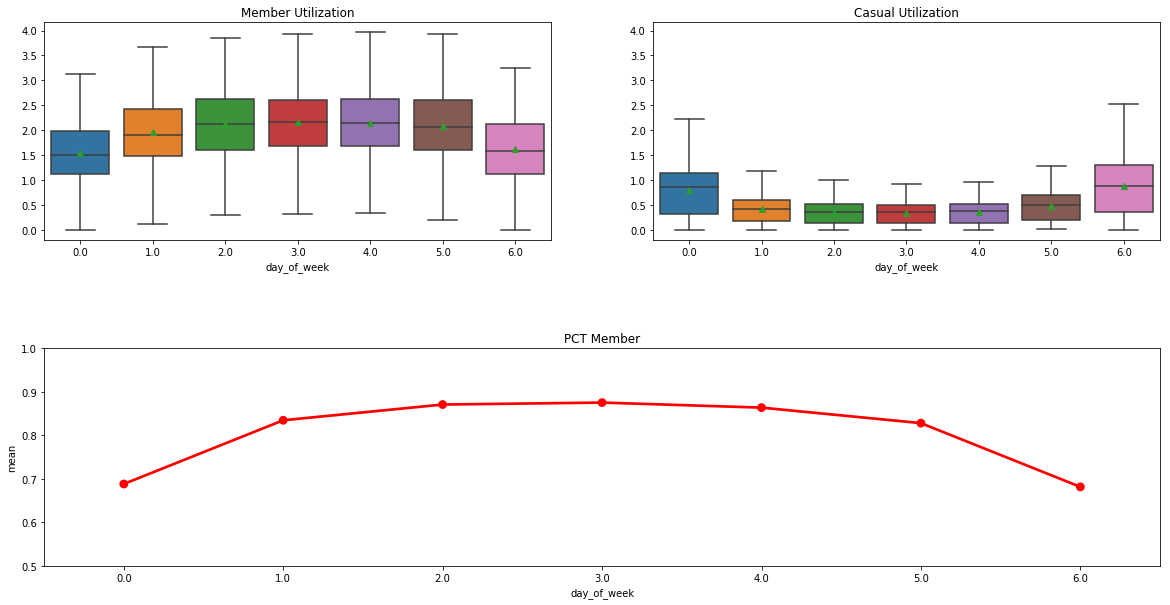

In [9]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222, sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(212)
sns.boxplot(x="day_of_week", y='cabi_trips_member_util', data=df[(df['year'] <=2017) & (df['year'] >=2011)], ax= ax1, showfliers=False, showmeans=True)
sns.boxplot(x="day_of_week", y='cabi_trips_casual_util', data=df[(df['year'] <=2017) & (df['year'] >=2011)], ax= ax2, showfliers=False, showmeans=True)
perc = df[(df['year'] <=2017) & (df['year'] >=2011)].groupby(['day_of_week'])['cabi_trips_member_perc'].agg(['mean']).reset_index()
sns.pointplot(x='day_of_week', y='mean', data=perc, ax=ax3, color='r')

ax1.set_title('Member Utilization')
ax1.yaxis.label.set_visible(False)
ax2.set_title('Casual Utilization')
ax2.yaxis.label.set_visible(False)
ax3.set_title('PCT Member')
ax3.set_ylim(.5,1)
plt.legend(loc='best')

fig.subplots_adjust(hspace=.5)

all_in_one_save(
        "Utilization DOW Cas vs Mem", "C:/Users/Noah/Bikeshare-DC_Old/For Upload", dr,
        '1LRJWj6wLBWvyBJbN93jXA2dpgF3BLrN3')


## CaBi Bike Utilization Rate by Month
    - Casual vs Memebership 



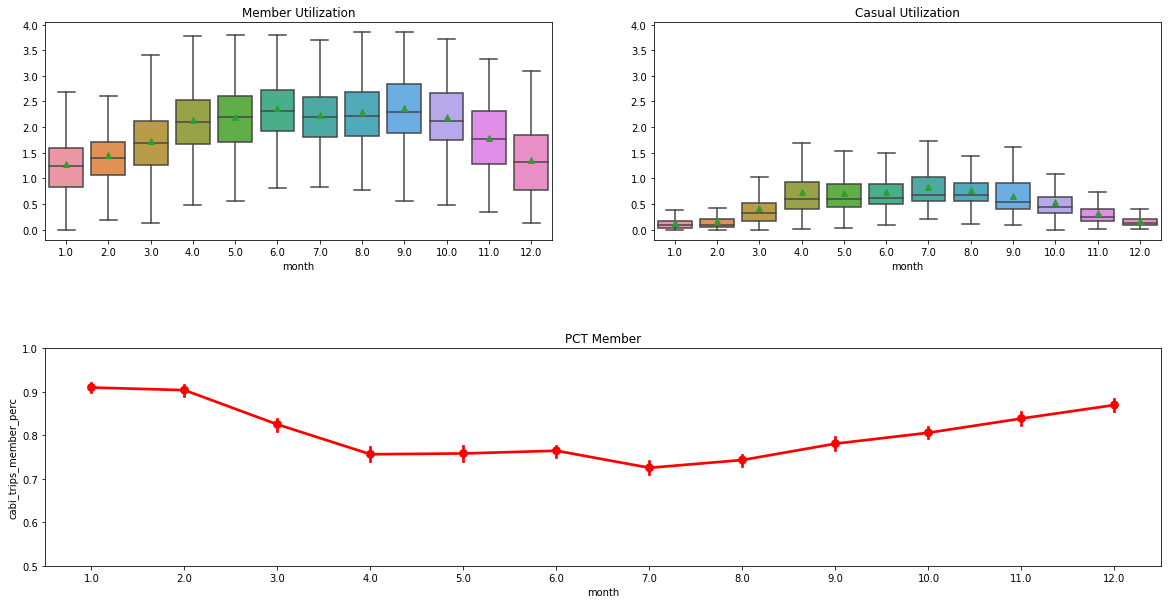

In [10]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222, sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(212)
sns.boxplot(x="month", y='cabi_trips_member_util', data=df[(df['year'] <=2017) & (df['year'] >=2011)], ax= ax1, showfliers=False, showmeans=True)
sns.boxplot(x="month", y='cabi_trips_casual_util', data=df[(df['year'] <=2017) & (df['year'] >=2011)], ax= ax2, showfliers=False, showmeans=True)
sns.pointplot(x='month', y='cabi_trips_member_perc', data=df[(df['year'] <=2017) & (df['year'] >=2011)], ax=ax3, color='r')

ax1.set_title('Member Utilization')
ax1.yaxis.label.set_visible(False)
ax2.set_title('Casual Utilization')
ax2.yaxis.label.set_visible(False)
ax3.set_title('PCT Member')
ax3.set_ylim(.5,1)
plt.legend(loc='best')

fig.subplots_adjust(hspace=.5)

all_in_one_save(
        "Utilization Month Cas vs Mem", "C:/Users/Noah/Bikeshare-DC_Old/For Upload", dr,
        '1LRJWj6wLBWvyBJbN93jXA2dpgF3BLrN3')

### Cabi Duration Average and Total by month by memebership type|

0 cabi_trip_dur_tot_wdc_to_wdc_member
1 cabi_trip_dur_tot_wdc_to_wdc_casual
2 cabi_trip_dur_avg_wdc_to_wdc_member
3 cabi_trip_dur_avg_wdc_to_wdc_casual


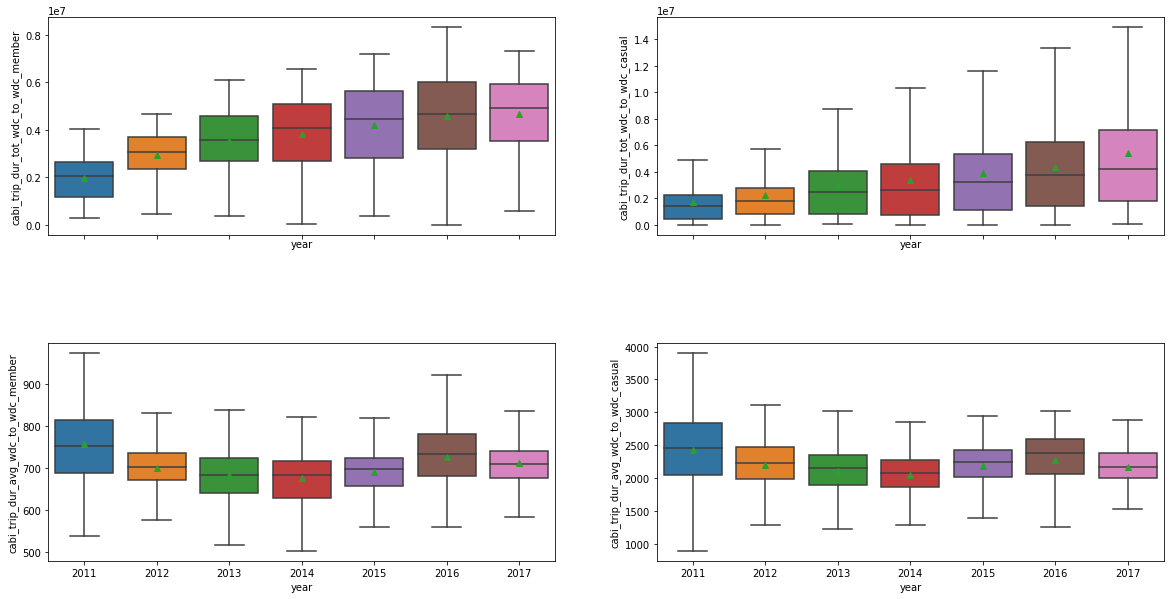

In [11]:
variables =['cabi_trip_dur_tot_wdc_to_wdc_member', 'cabi_trip_dur_tot_wdc_to_wdc_casual', 'cabi_trip_dur_avg_wdc_to_wdc_member', 'cabi_trip_dur_avg_wdc_to_wdc_casual']
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(20,10))
axs = axs.ravel()
for i, var in enumerate(variables):
    print(i, var)
    sns.boxplot(x="year", y=var, data=df[(df['year'] <=2017) & (df['year'] >=2011) ], ax= axs[i], showfliers=False, showmeans=True)
    
plt.legend(loc='best')

fig.subplots_adjust(hspace=.5)
all_in_one_save(
        "Duration (Avg & TOT) Month Cas vs Mem", "C:/Users/Noah/Bikeshare-DC_Old/For Upload", dr,
        '1LRJWj6wLBWvyBJbN93jXA2dpgF3BLrN3')

## Weather and Cabi WDC to WDC Trips

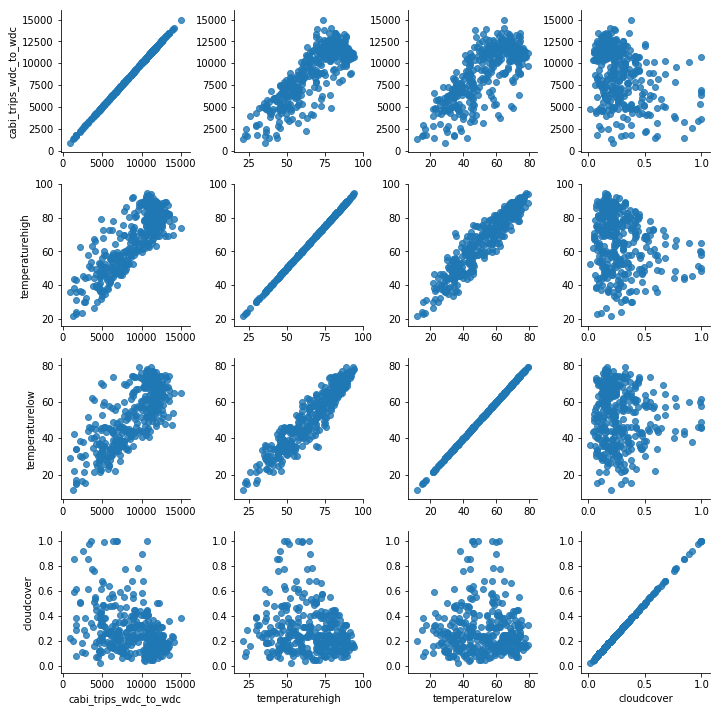

In [12]:
df_2017 = df[df['year'] == 2017]
g = sns.PairGrid(df_2017, vars=['cabi_trips_wdc_to_wdc', 'temperaturehigh', 'temperaturelow', 'cloudcover'],
                palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)

all_in_one_save(
        "PairGFrid Weather vs Cabi DC Trips", "C:/Users/Noah/Bikeshare-DC_Old/For Upload", dr,
        '1LRJWj6wLBWvyBJbN93jXA2dpgF3BLrN3')